- 고객군집분석   
    - 실제 온라인 리테일 자료로 군집분석을 해서 고객별 분류를 한다.


In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import math
import matplotlib.pyplot as plt

# 폰트 및 마이너스 깨짐 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

In [6]:
retail_df = pd.read_excel('./data/Online Retail.xlsx')
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


- InvoiceNo 송장 번호:
    - 송장 번호. 명목 번호. 각 거래에 고유하게 할당되는 6자리 정수입니다. 이 코드가 'c'로 시작하면 취소를 나타냅니다.

- StockCode 재고 코드:
    - 제품(품목) 코드. 명목상 번호. 각 제품에 고유하게 할당되는 5자리 정수입니다.

- Description 설명:
    - 제품(품목)명. 명목명.

- Quantity 수량:
    - 거래당 각 제품(품목)의 수량. 숫자 형식.

- InvoiceDate 송장 날짜:
    - 송장 날짜 및 시간. 숫자. 거래가 발생한 날짜와 시간입니다.

- UnitPrice 단가:
    - 단가. 숫자. 제품 단위당 가격(파운드).

- CustomerID 고객 ID:
    - 고객 번호. 명목 번호. 각 고객에게 고유하게 부여되는 5자리 정수입니다.

- Country 국가:
    - 국가명. 명목상. 고객이 거주하는 국가의 이름입니다.

In [8]:
# retail_df 정보확인
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [9]:
retail_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [11]:
retail_df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


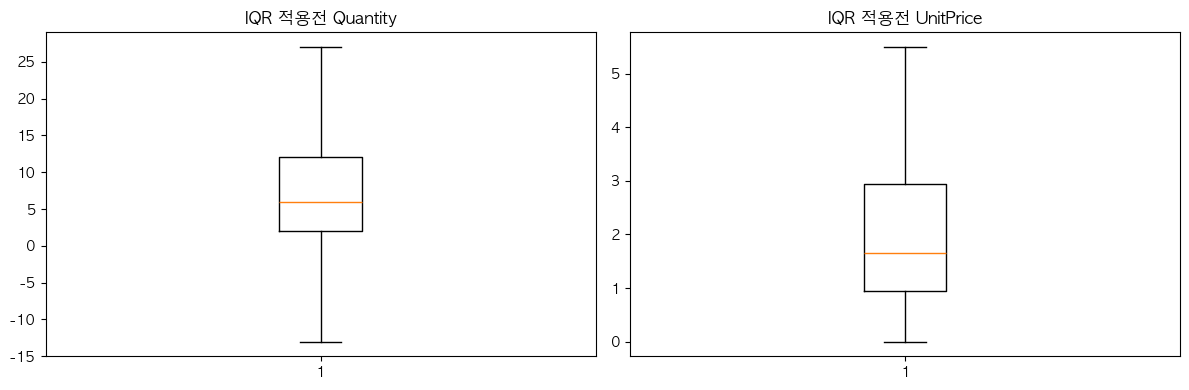

In [68]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.boxplot(retail_df['Quantity']) # boxplot -> 이상치확인
plt.title('IQR 적용전 Quantity')

plt.subplot(1, 2, 2)
plt.boxplot(retail_df['UnitPrice']) # boxplot -> 이상치확인
plt.title('IQR 적용전 UnitPrice')

plt.tight_layout()
plt.show()


In [16]:
# 결측치 제거
retail_df = retail_df.dropna() 

# IQR 방식으로 이상치 제거하는 함수
def remove_outlier_iqr(df ,column):
    Q1 = df[column].quantile(0.25) # 1사분위수
    Q3 = df[column].quantile(0.75) # 3사분위수
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR # 상한선
    upper = Q3 + 1.5 * IQR # 하한선

    return df[(df[column] >= lower) & (df[column] <= upper)]

# Quantity, UnitPrice 이상치 제거
retail_df = remove_outlier_iqr(retail_df, 'Quantity')
retail_df = remove_outlier_iqr(retail_df, 'UnitPrice')
retail_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
# UnitPrice는 정제과정을 한번 거쳤으나 이상치가 너무 많아 한번 더 IQR 정제
retail_df = remove_outlier_iqr(retail_df, 'UnitPrice')
retail_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


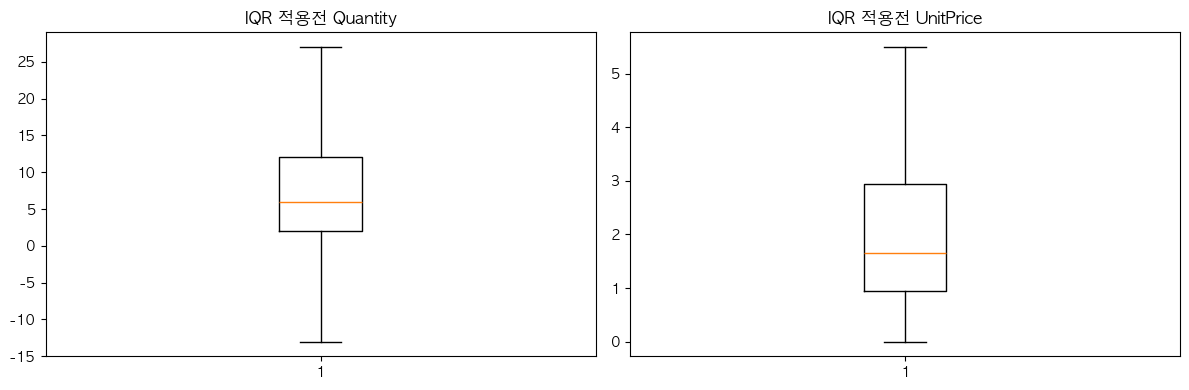

In [ ]:
# 결측치 제거 후 이상치 확인
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.boxplot(retail_df['Quantity']) # boxplot -> 이상치확인
plt.title('IQR 적용전 Quantity')

plt.subplot(1, 2, 2)
plt.boxplot(retail_df['UnitPrice']) # boxplot -> 이상치확인
plt.title('IQR 적용전 UnitPrice')

plt.tight_layout()
plt.show()


In [25]:
retail_df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,328540.000000,328540,328540.000000,328540.000000
mean,7.455482,2011-07-12 21:17:48.907104512,2.003722,15321.926103
min,-13.000000,2010-12-01 08:26:00,0.000000,12347.000000
25%,2.000000,2011-04-08 10:26:00,0.950000,13985.000000
50%,6.000000,2011-08-03 14:07:00,1.650000,15241.000000
75%,12.000000,2011-10-23 14:47:00,2.950000,16818.000000
max,27.000000,2011-12-09 12:50:00,5.500000,18287.000000
std,6.942291,NaN,1.286148,1714.098597


In [19]:
retail_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [22]:
retail_df['Country'].unique() # 거래가 발생한 국가 목록

array(['United Kingdom', 'France', 'Australia', 'Germany', 'Norway',
       'EIRE', 'Switzerland', 'Poland', 'Portugal', 'Italy', 'Belgium',
       'Lithuania', 'Japan', 'Iceland', 'Channel Islands', 'Denmark',
       'Spain', 'Cyprus', 'Finland', 'Austria', 'Sweden', 'Netherlands',
       'Greece', 'Singapore', 'Lebanon', 'United Arab Emirates', 'Israel',
       'Saudi Arabia', 'Czech Republic', 'Canada', 'Unspecified',
       'Brazil', 'USA', 'European Community', 'Bahrain', 'Malta', 'RSA'],
      dtype=object)

In [27]:
retail_df['Country'].value_counts()  # 국가별 거래건수 분포

Country
United Kingdom          295977
Germany                   7555
France                    6792
EIRE                      5241
Spain                     1984
Belgium                   1652
Switzerland               1417
Portugal                  1234
Norway                     735
Italy                      603
Netherlands                587
Australia                  521
Channel Islands            517
Finland                    500
Cyprus                     461
Austria                    329
Denmark                    297
Sweden                     252
Poland                     247
USA                        238
Unspecified                200
Israel                     184
Iceland                    164
Japan                      135
Singapore                  129
Canada                     124
Greece                     106
Malta                       99
United Arab Emirates        58
RSA                         46
European Community          44
Lebanon                     27


In [30]:
# 수량과 단가를 곱해서 거래금액 컬럼 생성, 고객 ID는 정수형으로 변환
retail_df['sale_amount'] =  retail_df['Quantity'] * retail_df['UnitPrice']
retail_df['CustomerID'] = retail_df['CustomerID'].astype(int)  # astype => 데이터 타입 변환

retail_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sale_amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [37]:
# 어떤 고객(고객 ID로 그룹핑)이 가장 많이 샀을까??? (sale_amount를 sum해주고, 내림차순으로 정렬)
retail_df.groupby("CustomerID")['sale_amount'].sum().sort_values(ascending=False)

CustomerID
14911    76323.57
13089    32624.33
17841    29036.78
14096    27209.44
14298    23848.93
           ...   
13958      -48.30
17548      -51.00
15728      -62.55
15823     -159.90
16252     -222.79
Name: sale_amount, Length: 4209, dtype: float64

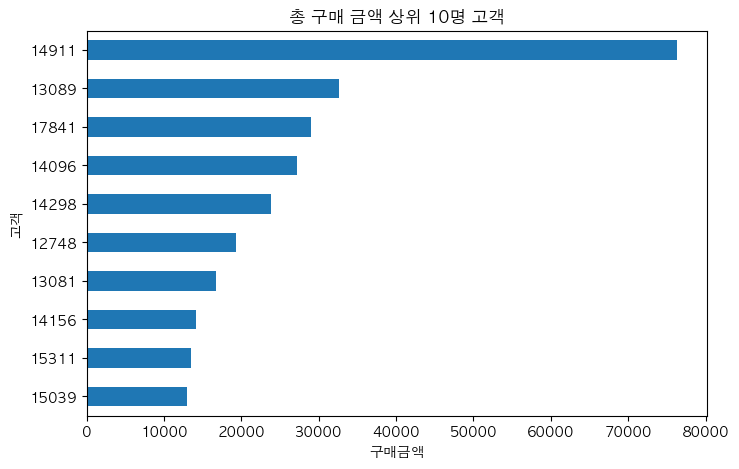

In [ ]:
# 어떤고객이 가장많이 샀을까???????????????????????????????? (sale)
top10 = (retail_df.groupby('CustomerID')['sale_amount'].sum().sort_values(ascending=False).head(10).sort_values())

plt.figure(figsize=(8, 5))
top10.plot(kind='barh')
plt.title("총 구매 금액 상위 10명 고객")
plt.xlabel("구매금액")
plt.ylabel("고객")
plt.show()

In [47]:
# 상위 10% 고객이 차지하는 매출 비중 계산
customer_sales = retail_df.groupby('CustomerID')['sale_amount'].sum().sort_values(ascending=False)

total_customers = customer_sales.shape[0]  # 전체 고객 수

top_10_percent_cnt = int(total_customers * 0.1)  # 상위 10% 고객 수

top_10_sales = customer_sales.iloc[:top_10_percent_cnt].sum()  # 상위 10% 고객 매출 합계

total_sales = customer_sales.sum()  # 전체 매출 합계

top_10_ratio = (top_10_sales / total_sales) * 100

top_10_ratio

print(f"상위 10% 고객이 차지하는 매출 비중 : {top_10_ratio:.1f}")


상위 10% 고객이 차지하는 매출 비중 : 47.0


In [49]:
# 고객 ID를 기준으로 각종 데이터를 집계
aggregation = {
    'sale_amount' : 'sum',  # 고객별 총 구매금액
    'InvoiceNo' : 'count',   # 고객별 구매 횟수
    'InvoiceDate' : 'max',   # 고객의 마지막 구매 일자
    'CustomerID' : 'nunique'
}

cust_df = retail_df.groupby('CustomerID').agg(aggregation) # 고객 단위로 각종 지표 집계

In [50]:
#기준일자를 설정하고, 기준일자 최근 구매일로부터 경과한 일수를 숫자 데이터로 변환해 계산

import datetime as dt

cust_df['InvoiceDate'] = dt.datetime(2011, 12, 10) - cust_df['InvoiceDate'] #일자로 반환

cust_df

,sale_amount,InvoiceNo,InvoiceDate,CustomerID
CustomerID,,,,
12347,3243.33,164,2 days 08:08:00,1
12348,90.20,6,248 days 13:13:00,1
12349,918.10,53,18 days 14:09:00,1
12350,294.40,16,310 days 07:59:00,1
12352,866.01,66,36 days 09:23:00,1
...,...,...,...,...
18280,119.15,7,277 days 14:08:00,1
18281,46.92,5,180 days 13:07:00,1
18282,98.18,8,7 days 12:17:00,1


In [51]:
# 최근 구매 경과시간을 일 단위로 변환하여 모델링에 사용 가능하게 만듦
cust_df['InvoiceDate'] = cust_df['InvoiceDate'].dt.days # 일시 -> 일자(day)로 변경
cust_df

,sale_amount,InvoiceNo,InvoiceDate,CustomerID
CustomerID,,,,
12347,3243.33,164,2,1
12348,90.20,6,248,1
12349,918.10,53,18,1
12350,294.40,16,310,1
12352,866.01,66,36,1
...,...,...,...,...
18280,119.15,7,277,1
18281,46.92,5,180,1
18282,98.18,8,7,1


In [52]:
# 스케일링 및 군집분석
from sklearn.preprocessing import StandardScaler  # 평균0, 표준편차1로 스케일링 해주는 도구
from sklearn.cluster import KMeans                # 군집화 모델
from sklearn.metrics import silhouette_score, silhouette_samples # 군집 품질 평가 도구


In [53]:
scaled_data = StandardScaler().fit_transform(cust_df)
scaled_data

array([[ 1.1877665 ,  0.43951457, -0.89122159,  0.        ],
       [-0.42927709, -0.36849696,  1.55004932,  0.        ],
       [-0.00469885, -0.1281391 , -0.73243975,  0.        ],
       ...,
       [-0.42518465, -0.35826896, -0.84160227,  0.        ],
       [ 0.57069467,  3.4363168 , -0.88129773,  0.        ],
       [ 0.0171788 , -0.14348109, -0.49426697,  0.        ]],
      shape=(4209, 4))

In [63]:
# 군집 분포 확인
kmeans = KMeans(
    n_clusters = 5,    # 군집 갯수
    random_state = 0   # 시드 고정
)
kmeans.fit(scaled_data)  # 군집 학습
kmeans.labels_           # 군집 할당 결과

array([2, 1, 0, ..., 0, 2, 0], shape=(4209,), dtype=int32)

In [60]:
# cust_df의 cluster 파생변수를 만들어 군집 할당 결과를 저장
cust_df['cluster'] = kmeans.labels_  # 군집 할당 결과를 특성으로 저장
cust_df

,sale_amount,InvoiceNo,InvoiceDate,CustomerID,cluster
CustomerID,,,,,
12347,3243.33,164,2,1,0
12348,90.20,6,248,1,1
12349,918.10,53,18,1,0
12350,294.40,16,310,1,1
12352,866.01,66,36,1,0
...,...,...,...,...,...
18280,119.15,7,277,1,1
18281,46.92,5,180,1,1
18282,98.18,8,7,1,0


In [64]:
silhouette_score(
    scaled_data,    # 스케일된 입력 데이터
    kmeans.labels_  # 군집 라벨
)

0.5885699651729771

- 실루엣 계수가 0.5로 나쁘진 않다.
- 낮을 경우에는
    - 군집 수 조정
    - DBSCAN, GMM 등의 다른 군집 알고리즘으로 구현해본다.
